# Собственное непрерывное распределение


## Тема
Создание и анализ собственного распределения непрерывной случайной величины в Python


## Описание
Рассмотрим кастомное распределение с линейно убывающей плотностью на интервале [1, 4]. Для этой случайной величины X аналитически вычислим закон распределения, математическое ожидание, дисперсию, стандартное отклонение, медиану, квантиль, коэффициент асимметрии и эксцесс.


## 1. Определение функции плотности
Пусть X — случайная величина с линейно убывающей плотностью:
$$
\phi(x) = \begin{cases}
-\frac{2}{9}x + \frac{8}{9}, & 1 \le x \le 4 \\
0, & \text{иначе}
\end{cases}
$$


### Проверка нормировки
$$
\int_{1}^{4} f_X(x) dx = \int_{1}^{4} \left(-\frac{2}{9}x + \frac{8}{9}\right) dx = 1
$$

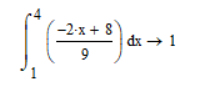

Функция распределения задается по определению через интеграл плотности:


$$
F(x) = \begin{cases}
0, & x < 1 \\
\int_{1}^{x} \phi(t) dt, & 1 \le x \le 4 \\
1, & x > 4
\end{cases}
$$


Интеграл на интервале 1 ≤ x ≤ 4:
$$
F(x) = \int_{1}^{x} \left(-\frac{2}{9}t + \frac{8}{9}\right) dt = -\frac{1}{9}x^2 + \frac{8}{9}x - \frac{7}{9}
$$

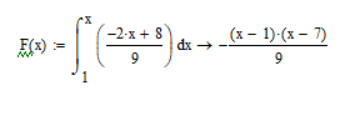


### Проверка значений на границах
$$
F(1) = 0, \quad F(4) = 1
$$

### Математическое ожидание
$$
M[X] = \int_{1}^{4} x \phi(x) dx = \int_{1}^{4} x \left(-\frac{2}{9}x + \frac{8}{9}\right) dx = 2
$$

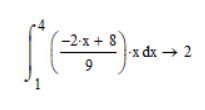


### Дисперсия
$$
D[X] = \int_{1}^{4} (x - M[X])^2 \phi(x) dx = \int_{1}^{4} (x-2)^2 \left(-\frac{2}{9}x + \frac{8}{9}\right) dx = 0.5
$$

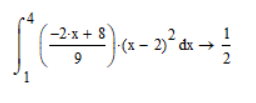


### Стандартное отклонение
$$
\sigma[X] = \sqrt{D[X]} \approx 0.707
$$

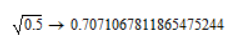


### Медиана
$$
F(x_{0.5}) = 0.5 \implies x_{0.5} = 1.879
$$

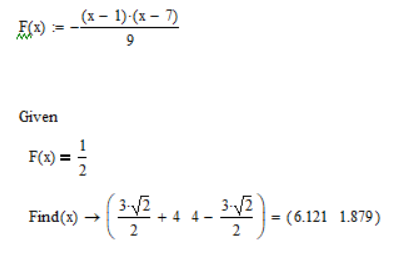


### Квантили
$$
F(x_q) = 0.25 \implies x_q = 1.402
$$

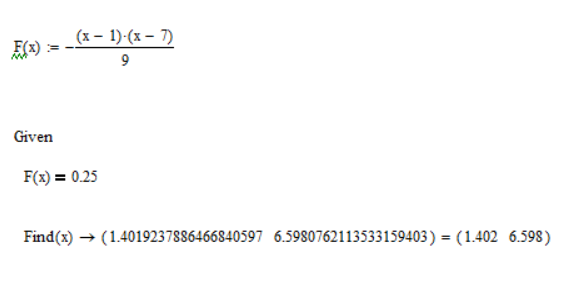

### q% точка

Это квантиль уровня 1 - q/100

### Коэффициент асимметрии и эксцесс
$$
\text{Ассиметрия: } A = \frac{\int_{1}^{4} (x - M[X])^3 \phi(x) dx}{\sigma^3} \approx 0.56
$$

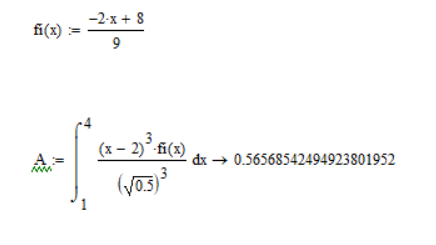

$$
\text{Эксцесс: } E = \frac{\int_{1}^{4} (x - M[X])^4 \phi(x) dx}{\sigma^4} - 3 \approx -0.6
$$

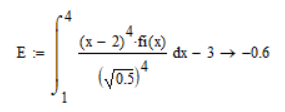

Условие нормировки выполнено
Граничные условия выполнены
M(X) = 2.0000
D(X) = 0.5000
A(X) = 0.5657
E(X) = -0.6000
P(2 <= X <= 3) = 0.3333
25%-квантиль: 1.4019
60%-точка: 1.6762


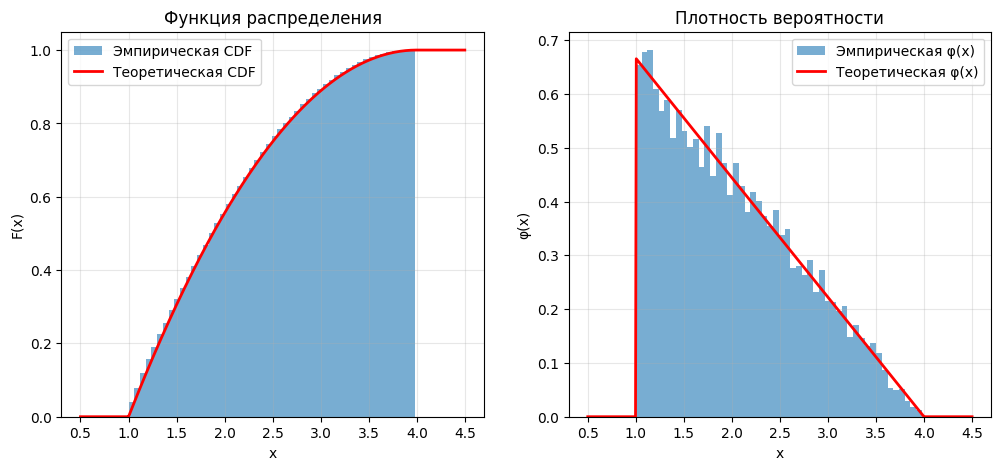

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate

class LinearDecreasingDist(rv_continuous):
    def __init__(self, a=1, b=4, **kwargs):
        super().__init__(a=a, b=b, name='linear_decreasing', **kwargs)
        self.a = a
        self.b = b

    def _pdf(self, x):
        result = np.zeros_like(x)
        mask = (x >= self.a) & (x <= self.b)
        result[mask] = -2 * x[mask] / 9 + 8/9
        return result

    def _cdf(self, x):
        result = np.zeros_like(x, dtype=float)
        result[x < self.a] = 0
        mask = (x >= self.a) & (x <= self.b)
        for i, xi in enumerate(x[mask]):
            result[np.where(mask)[0][i]] = integrate.quad(lambda t: -2*t/9 + 8/9, self.a, xi)[0]
        result[x > self.b] = 1
        return result


linear_dist = LinearDecreasingDist()

integral, error = integrate.quad(linear_dist.pdf, linear_dist.a, linear_dist.b)
assert np.isclose(integral, 1), "Нормировка не выполнена"
print("Условие нормировки выполнено")

left, right = linear_dist.cdf(linear_dist.a - 1), linear_dist.cdf(linear_dist.b + 1)
assert np.isclose(left, 0) and np.isclose(right, 1)
print("Граничные условия выполнены")

mean, var, skew, kurtosis = linear_dist.stats(moments="mvsk")
print(f"M(X) = {mean:.4f}")
print(f"D(X) = {var:.4f}")
print(f"A(X) = {skew:.4f}")
print(f"E(X) = {kurtosis:.4f}")

prob = linear_dist.cdf(3) - linear_dist.cdf(2)
print(f"P(2 <= X <= 3) = {prob:.4f}")

q25 = linear_dist.ppf(0.25)
q40 = linear_dist.ppf(0.40)
print(f"25%-квантиль: {q25:.4f}")
print(f"60%-точка: {q40:.4f}")

samples = linear_dist.rvs(size=10000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

x_plot = np.linspace(linear_dist.a - 0.5, linear_dist.b + 0.5, 500)

ax1.hist(samples, bins=50, density=True, cumulative=True, alpha=0.6, label='Эмпирическая CDF')
ax1.plot(x_plot, linear_dist.cdf(x_plot), 'r-', linewidth=2, label='Теоретическая CDF')
ax1.set_title("Функция распределения")
ax1.set_xlabel("x")
ax1.set_ylabel("F(x)")
ax1.grid(True, alpha=0.3)
ax1.legend()

ax2.hist(samples, bins=50, density=True, alpha=0.6, label='Эмпирическая φ(x)')
ax2.plot(x_plot, linear_dist.pdf(x_plot), 'r-', linewidth=2, label='Теоретическая φ(x)')
ax2.set_title("Плотность вероятности")
ax2.set_xlabel("x")
ax2.set_ylabel("φ(x)")
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.show()
